In [1]:
import re
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics  a

In [10]:
list_link = []
a = 1
for page in range(1, 21):
    page_url = "https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=alle&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&fbclid=IwZXh0bgNhZW0CMTAAAR0-voJMuML3PKoXuYNo3teFk7euZAgOdzeNMFvV0tSBDwHAMrNcIMT8l-g_aem_yYgThqH-wAcTmBPFvX5TWQ&page=" + str(page)
    
    driver = webdriver.Chrome()

    driver.get(page_url)
    
    page_source = driver.page_source

    pattern = r'href="[^"]*/profil/spieler/[^"]*"'
    links = re.findall(pattern, page_source)

    for link in links:
        list_link.append(link)
    print(f"page = {a}")
    a+=1

page = 1
page = 2
page = 3
page = 4
page = 5
page = 6
page = 7
page = 8
page = 9
page = 10
page = 11
page = 12
page = 13
page = 14
page = 15
page = 16
page = 17
page = 18
page = 19
page = 20


In [11]:
list_link

['href="/jude-bellingham/profil/spieler/581678"',
 'href="/erling-haaland/profil/spieler/418560"',
 'href="/vinicius-junior/profil/spieler/371998"',
 'href="/kylian-mbappe/profil/spieler/342229"',
 'href="/phil-foden/profil/spieler/406635"',
 'href="/bukayo-saka/profil/spieler/433177"',
 'href="/florian-wirtz/profil/spieler/598577"',
 'href="/jamal-musiala/profil/spieler/580195"',
 'href="/rodri/profil/spieler/357565"',
 'href="/lamine-yamal/profil/spieler/937958"',
 'href="/federico-valverde/profil/spieler/369081"',
 'href="/declan-rice/profil/spieler/357662"',
 'href="/rodrygo/profil/spieler/412363"',
 'href="/lautaro-martinez/profil/spieler/406625"',
 'href="/martin-odegaard/profil/spieler/316264"',
 'href="/eduardo-camavinga/profil/spieler/640428"',
 'href="/aurelien-tchouameni/profil/spieler/413112"',
 'href="/victor-osimhen/profil/spieler/401923"',
 'href="/harry-kane/profil/spieler/132098"',
 'href="/gavi/profil/spieler/646740"',
 'href="/julian-alvarez/profil/spieler/576024"',


In [12]:
link=np.array(list_link)
link_df=pd.DataFrame(link)

In [13]:
link_df.to_csv(r'C:\University of Phayao\Year 3\Web Scaping/link.csv',index=False)

In [22]:
element_list = []
value_list = []
for page in range(1, 21):
    page_url = "https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=alle&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&fbclid=IwZXh0bgNhZW0CMTAAAR0-voJMuML3PKoXuYNo3teFk7euZAgOdzeNMFvV0tSBDwHAMrNcIMT8l-g_aem_yYgThqH-wAcTmBPFvX5TWQ&page=" + str(page)
    
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)

    driver.get(page_url)
    
    driver.implicitly_wait(10)

    page_source = driver.page_source

    pattern = r'class="zentriert">(.*?)<\/td>'
    ages = re.findall(pattern, page_source)

    for age in ages:
        # print(age)
        element_list.append(age)
    

    pattern_values = r'href="[^"]*">€([^<]*)<\/'

    values = re.findall(pattern_values, page_source)

    for value in values:
        # print(value)
        value_list.append(value)
# driver.quit()
    # Close the driver
    # driver.quit()

# print(element_list)


In [41]:
ages_NP=np.array(element_list)
asd=ages_NP.reshape(-1, 4)
df=pd.DataFrame(asd)

In [42]:
df['Country'] = df[2].apply(lambda x: re.search(r'title="([^"]*)"', x).group(1))
df['club'] = df[3].apply(lambda x: re.search(r'title="([^"]*)"', x).group(1))
df['Age'] = df[1]

In [43]:
df = df.drop(columns=[0])
df = df.drop(columns=[1])
df = df.drop(columns=[2])
df = df.drop(columns=[3])

In [44]:
df['values']=pd.DataFrame(value_list)

In [48]:
df['values'] = df['values'].str.replace('m', '', regex=False)
df['Age'] = df['Age'].astype(int)
df['values'] = df['values'].astype(float)

In [91]:
df.to_csv(r'C:\University of Phayao\Year 3\Web Scaping/data_simple.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  500 non-null    object 
 1   club     500 non-null    object 
 2   Age      500 non-null    int32  
 3   values   500 non-null    float64
dtypes: float64(1), int32(1), object(2)
memory usage: 13.8+ KB


In [51]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [65]:
df.corr()['values'].sort_values()

Age       -0.038762
Country   -0.037476
club       0.073132
values     1.000000
Name: values, dtype: float64

In [84]:
X = df.drop(columns=['values']); y = df['values']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [86]:
model = LGBMRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 3
[LightGBM] [Info] Start training from score 39.420000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred) )  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred) )  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred) )) 

Mean Absolute Error: 16.805305529447597
Mean Squared Error: 621.3329087289156
Root Mean Squared Error: 24.926550277343146


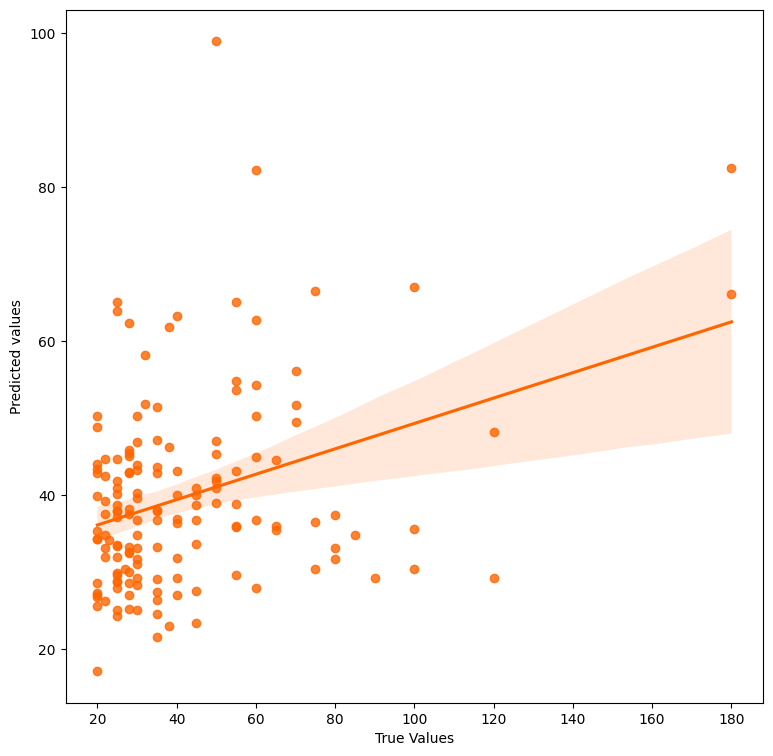

In [88]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x = y_test,y = y_pred, color='#FF6600')
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.show()